# How the code is organized
The code is provided in 2 sections:

Section 1: Auto mpg, Model Creation and Saving

Section 2: Deployment, For deployment, refer to the Flask application under the deployment folder

In [1]:
#import the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [2]:
#Read the auto-mpg dataset
input_data = pd.read_csv("datasets/auto-mpg.csv") 
input_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Develop an ML Model

Developing an ML model involves a number of steps.

Let us adopt the following Machine Learning Pipeline:

1. Sanity Check
2. EDA/Preprocessing
3. Feature Engineering
4. Model Building
5. Model Saving
6. Model Deployment

Once the model is deployed, the pipeline extends to include the below steps:

7. Model in Production
8. Observe model behaviour
9. Obtain updated datasets
10. Redo steps 1..9 if required

_Note: these extended steps are not covered in this exercise_


## Sanity Check

1. Shape and data sufficiency: Check if there are sufficient rows of data for an ML problem
2. Datatypes: Check whether all the columns in the given dataset is numeric
3. Missing Values: Check whether there are missing values
4. Zero-variance: Check if there are any zero variance column in the dataset
5. Range of numbers in each column: Check if the column values within the dataset are in the same magnitude
6. Correlation: Check correlation between feature columns & target


In [3]:
# 1 Shape
input_data.shape

(398, 9)

In [4]:
# 2 Datatypes: 
input_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [5]:
# 3 Missing Values: 
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
#4 zero variance column needs to be removed. 
for col in input_data:
    print(col, input_data[col].value_counts().count())

mpg 129
cylinders 5
displacement 82
horsepower 94
weight 351
acceleration 95
model year 13
origin 3
car name 305


In [7]:
#5 Range of numbers in each column: Check if the column values within the dataset are in the same magnitude
for i in input_data.columns:
    print(" Range of {} min {}, max {}" .format(i, min(input_data[i]), max(input_data[i])))

 Range of mpg min 9.0, max 46.6
 Range of cylinders min 3, max 8
 Range of displacement min 68.0, max 455.0
 Range of horsepower min 100, max ?
 Range of weight min 1613, max 5140
 Range of acceleration min 8.0, max 24.8
 Range of model year min 70, max 82
 Range of origin min 1, max 3
 Range of car name min amc ambassador brougham, max vw rabbit custom


In [8]:
# 6 Relationship between features & the target
input_data.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


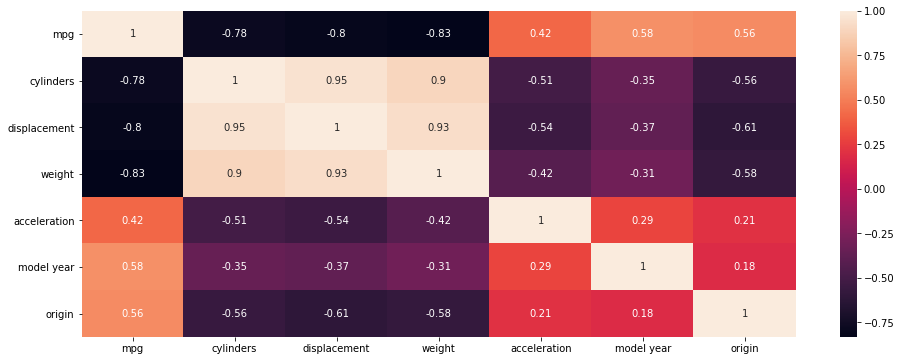

In [9]:
plt.figure(figsize=(16, 6))
sns.heatmap(input_data.corr(), annot=True);

### Insights / Sanity Check Conclusions¶

1. **Shape and data sufficiency: Check if there are sufficient rows of data for an ML problem**
    1. **INSIGHT:** Shape of the data is (399, 9). i.e., dataset contains ~400 observations, which is much greater than number of columns (9). Hence we can apply ML techniques rather than statistical rule-based approach.
    
2. **Datatypes: Check whether all the columns in the given dataset is numeric**
    1. **INSIGHT:** `Dtype` indicates that all columns except horsepower are numeric, in order to build an ML model we need to convert horsepower to numeric
    
3. **Missing Values: Check whether there are missing values**
    1. **INSIGHT:** `Non-Null Count` indicates there are no missing values in the dataset

4. **Zero-variance: Check if there are any zero variance column in the dataset**
    1. **INSIGHT:** No zero-variance columns found in the dataset

5. **Range of numbers in each column: Check if the column values within the dataset are in the same magnitude**
    1. **INSIGHT:** Each column has numbers within the same magnitude
    
6. **Correlation: Check correlation between feature columns & target**
    1. **INSIGHT:**  0.00 - 0.20 very weak correlation. No features exists
    2. **INSIGHT:**  0.20 - 0.40 have weak correlation. No features exists
    3. **INSIGHT:**  0.40 - 0.60 have Good Correlation - `acceleration`, `model year`, `origin`
    4. **INSIGHT:**  0.60 - 0.80 Strong correlation - `cylinder`, `displacement`, `horse power`
    5. **INSIGHT:**  0.80 - 1.0 very strong correlation - `weight` 

***Note:*** *absolute values of correlations were considered*

Conclusions are drawn after plotting the features against target using  heatmap & scatter plot

### EDA/Preprocessing
_(Based on the insights from the sanity check, we can now determine how to process the data.)_

#### Checklist of STANDARD EDA items

1. Strategy for missing data
    1. Action: convert horsepower to numeric
    2. Action: horsepower has six missing values, drop these rows
    
    
2. Convert categorical to numeric
    1. origin, cylinders, model year are categorical but already numeric
    
    
3. Dimensionality reduction/Drop the identified columns
    1. Action: Drop the carname column 
    
    
4. Check for Outliers, Normalize data in columns to fit a range (*Optional*)
    1. Action: As per Insights 5A there are no Outliers ----NOT DONE


### Approach:
As there is a strong correlation between features and target we will consider all the 7 numeric columns to build our ML model

In [10]:
#    1. Action: convert horsepower to numeric
for column in ['horsepower']:
    input_data[column] = pd.to_numeric(input_data[column], errors = 'coerce')

# Dropping invalid rows in horsepower column, it can either done using df.attribute or df['attribute']
#    2. Action: horsepower has six missing values, drop these rows
input_data.dropna(axis = 0,inplace = True)

input_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [11]:
# car_name column does not have any impact on the target column
# Drop the carname column
input_data.drop(['car name'], axis = 1, inplace = True)


In [12]:
X = input_data.drop('mpg',axis=1)
y = input_data['mpg']

In [13]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
object = StandardScaler()
X = object.fit_transform(X)
print(X)

[[ 1.48394702  1.07728956  0.66413273 ... -1.285258   -1.62531533
  -0.71664105]
 [ 1.48394702  1.48873169  1.57459447 ... -1.46672362 -1.62531533
  -0.71664105]
 [ 1.48394702  1.1825422   1.18439658 ... -1.64818924 -1.62531533
  -0.71664105]
 ...
 [-0.86401356 -0.56847897 -0.53247413 ... -1.4304305   1.63640964
  -0.71664105]
 [-0.86401356 -0.7120053  -0.66254009 ...  1.11008813  1.63640964
  -0.71664105]
 [-0.86401356 -0.72157372 -0.58450051 ...  1.40043312  1.63640964
  -0.71664105]]


# LINEAR REGRESSION

#### Step 1:
Build the ML model with the complete data, test and validate the predictions.

In [14]:
from sklearn.linear_model import LinearRegression


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(313, 7) (79, 7) (313,) (79,)


In [16]:
# create and fit a linear regression model
lm_input_data = LinearRegression()
auto_mpg_model = lm_input_data.fit(X_train, y_train)

yhat = auto_mpg_model.predict(X_test)

# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = auto_mpg_model.predict(X_test)
train_prediction = [int(round(x,0)) for x in train_predictions]
print('\nfirst 20 training preds:\n\n', train_prediction[:20])


first 20 training preds:

 [26, 26, 35, 25, 28, 31, 9, 31, 21, 29, 13, 25, 17, 30, 22, 29, 20, 33, 27, 30]


In [17]:
# simple function to compare actual and predicted values
def compare_prediction(y, yhat):
    comp_matrix = pd.DataFrame(zip(y, yhat), columns = ['Actual', 'Predicted'])
    comp_matrix['Err'] = abs(comp_matrix['Actual']-comp_matrix['Predicted'])
    comp_matrix['PctErr'] = comp_matrix['Err']/comp_matrix['Actual'] * 100
    mean_value = np.mean(comp_matrix['PctErr'])
    return comp_matrix, mean_value

In [18]:
# compare actual and predicted values
comp_matrix, mean = compare_prediction(y_test, yhat)
print("Model 1 prediction comparison and mean error:", comp_matrix, mean)
accuracy1 = round((100-mean),2)
print('Model1 accuracy =', accuracy1)

Model 1 prediction comparison and mean error:     Actual  Predicted       Err     PctErr
0     26.0  25.841562  0.158438   0.609379
1     21.6  26.036745  4.436745  20.540484
2     36.1  34.506018  1.593982   4.415462
3     26.0  24.895532  1.104468   4.247954
4     27.0  28.425987  1.425987   5.281434
..     ...        ...       ...        ...
74    17.6  24.164562  6.564562  37.298648
75    28.0  24.063693  3.936307  14.058238
76    15.0  14.015525  0.984475   6.563167
77    16.0  14.858753  1.141247   7.132797
78    27.0  25.759440  1.240560   4.594667

[79 rows x 4 columns] 11.789209476960911
Model1 accuracy = 88.21


In [19]:
import math
# metrics to chech effectivemess  is MSE and RMSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, yhat)
RMSE = math.sqrt(MSE)
print(f'Mean Squared Error : {MSE}, Root Mean Squared Error : {RMSE}')
print('Mean Squared Error : %d' %MSE, 'Root Mean Squared Error : %d'%RMSE)

Mean Squared Error : 10.710864418838401, Root Mean Squared Error : 3.272745700300957
Mean Squared Error : 10 Root Mean Squared Error : 3


In [20]:
# save auto_mpg_model as per analysis
model_file = open('models/linear_auto_mpg_model.pkl','wb')
pickle.dump(auto_mpg_model, model_file)
model_file.close()

In [21]:
# reload the model from disk and check if it is saved properly.
model_file = open('models/linear_auto_mpg_model.pkl', 'rb')
lr_model = pickle.load(model_file)
model_file.close()
print(lr_model)

LinearRegression()


# LOGISTIC REGRESSION

In [22]:
y.min(), y.max()

(9.0, 46.6)

In [23]:
input_data['mpg-bin'] = pd.qcut(input_data['mpg'], q=5)
X = input_data.drop(['mpg','mpg-bin'],axis=1)
y = input_data['mpg-bin']


In [24]:
y



0       (16.0, 20.0]
1      (8.999, 16.0]
2       (16.0, 20.0]
3      (8.999, 16.0]
4       (16.0, 20.0]
           ...      
393    (25.0, 30.98]
394    (30.98, 46.6]
395    (30.98, 46.6]
396    (25.0, 30.98]
397    (30.98, 46.6]
Name: mpg-bin, Length: 392, dtype: category
Categories (5, interval[float64]): [(8.999, 16.0] < (16.0, 20.0] < (20.0, 25.0] < (25.0, 30.98] < (30.98, 46.6]]

In [25]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
 
y= label.fit_transform(y) 
print(y)


[1 0 1 0 1 0 0 0 0 0 0 0 0 0 2 2 1 2 3 3 2 2 2 3 2 0 0 0 0 3 3 2 1 0 1 1 1
 0 0 0 0 0 0 0 1 2 1 1 2 3 3 3 4 4 3 3 2 2 2 1 2 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 2 2 3 2 3 2 3 3 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 2 3 0 0 0 0 1 1 2 2 1
 1 2 3 0 0 3 2 1 1 0 2 1 0 1 1 0 4 3 4 2 0 0 1 0 0 0 0 0 3 3 3 4 4 3 2 3 2
 3 4 1 1 0 0 0 0 0 0 1 0 0 1 2 1 0 3 2 1 2 2 2 2 1 3 1 2 2 2 2 4 3 2 2 3 3
 1 0 0 0 2 2 2 2 3 2 3 4 1 1 1 1 3 4 3 3 1 0 1 1 1 1 0 0 0 4 3 4 3 4 1 1 0
 0 1 2 1 1 0 0 0 0 3 2 3 3 3 4 3 3 2 2 2 4 4 4 4 4 1 1 2 1 2 2 3 2 1 2 2 1
 1 1 1 1 1 3 3 3 3 2 2 2 2 2 1 2 1 4 3 2 1 2 2 2 1 1 1 1 1 0 1 1 4 4 4 3 3
 2 3 2 4 4 4 4 3 3 3 4 4 4 4 4 3 3 2 1 4 3 4 4 4 4 3 4 4 4 4 3 4 4 3 4 2 4
 4 3 3 3 2 3 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 3 3 3 2 2 3 2 1 3 3 4 4 3 3 2 4
 4 4 4 4 4 4 4 4 4 4 2 4 3 2 4 4 3 3 4 4 3 4]


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(313, 7) (79, 7) (313,) (79,)


In [27]:
from sklearn.linear_model import LogisticRegression  
# create and fit a logistic regression model

lm_input_data = LogisticRegression(multi_class='multinomial', random_state=0)  
auto_mpg_model = lm_input_data.fit(X_train, y_train)  

# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions =lm_input_data.predict(X_train)

 #Predicting the test set result 
y_pred= auto_mpg_model.predict(X_test)  
y_pred


C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([4, 2, 4, 4, 3, 4, 0, 4, 1, 4, 0, 2, 0, 4, 2, 3, 1, 4, 3, 3, 1, 4,
       4, 0, 4, 3, 2, 1, 4, 3, 0, 1, 1, 3, 0, 4, 0, 3, 0, 0, 0, 4, 4, 3,
       0, 0, 1, 4, 3, 4, 0, 3, 2, 4, 1, 1, 1, 1, 3, 3, 0, 1, 2, 3, 3, 3,
       3, 4, 1, 0, 3, 0, 2, 4, 1, 3, 0, 0, 3])

In [28]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
coords = [x for x in range(0,5)]
cm = pd.DataFrame(cm,columns=coords, index=coords )
cm

,0,1,2,3,4
0,16,2,0,0,0
1,2,9,2,0,1
2,0,3,3,10,1
3,0,0,2,8,10
4,0,0,0,2,8


In [29]:
probs_arr = auto_mpg_model.predict_proba(X_test)
probs_df = pd.DataFrame(probs_arr, columns=coords)
probs_df.head(10)

,0,1,2,3,4
0,0.001805,0.053941,0.133231,0.365313,4.457097e-01
1,0.011738,0.154445,0.479543,0.322855,3.141795e-02
2,0.000042,0.005375,0.015970,0.098186,8.804272e-01
3,0.000730,0.033921,0.093723,0.275945,5.956811e-01
4,0.007214,0.147523,0.292632,0.481544,7.108641e-02
5,0.000758,0.035776,0.103012,0.302495,5.579583e-01
6,0.960870,0.034493,0.004622,0.000015,3.629670e-14
7,0.000813,0.035649,0.102782,0.313418,5.473381e-01
8,0.167599,0.450560,0.289900,0.091887,5.377341e-05
9,0.000039,0.002983,0.008925,0.067862,9.201917e-01


In [30]:
y_pred_proba = probs_df.idxmax(axis=1)

In [31]:
score = auto_mpg_model.score(X_test, y_test)
print('Test Accuracy Score', score)

Test Accuracy Score 0.5569620253164557


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, KFold

scores = cross_val_score(auto_mpg_model, X_train, y_train, cv=3)
print('Cross-Validation Accuracy Scores', scores.mean())

Cross-Validation Accuracy Scores 0.6135225885225886


C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [33]:
kfold = KFold(n_splits=5)
model = LogisticRegression(C=5)
results = cross_val_score(model,X,y,cv=kfold)
print(results)
print("Accuracy:",results.mean()*100)

C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.65822785 0.65822785 0.58974359 0.53846154 0.42307692]
Accuracy: 57.35475494969165


C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [34]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()


(0.580952380952381, 0.6135225885225886, 0.6538461538461539)

In [35]:
auto_mpg_model.score(X,y)


0.6147959183673469

In [36]:
train_accuracy = auto_mpg_model.score(X_train, y_train)
test_accuracy = auto_mpg_model.score(X_test, y_test)

In [37]:
print("train_accuracy", train_accuracy)

train_accuracy 0.6293929712460063


In [38]:
print("test_accuracy", test_accuracy)

test_accuracy 0.5569620253164557


In [39]:
# save auto_mpg_model as per analysis
model_file = open('models/logistic_auto_mpg_model.pkl','wb')
pickle.dump(auto_mpg_model, model_file)
model_file.close()

In [40]:
# reload the model from disk and check if it is saved properly.
model_file = open('models/logistic_auto_mpg_model.pkl', 'rb')
lr_model = pickle.load(model_file)
model_file.close()
print(lr_model)

LogisticRegression(multi_class='multinomial', random_state=0)


# Decision tree

In [41]:
# create and fit a Decision tree model

from sklearn.tree import DecisionTreeClassifier  
#classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  



classifier = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
auto_mpg_model = classifier.fit(X_train,y_train)
# computing y_pred (ie train_predictions) using X (ie train_features)
train_predictions = classifier.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]
y_pred = classifier.predict(X_test)

In [42]:
y_pred.min(), y_pred.max()

(0, 4)

In [43]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
coords = [x for x in range(0,5)]
cm = pd.DataFrame(cm,columns=coords, index=coords )
cm


,0,1,2,3,4
0,17,1,0,0,0
1,4,3,7,0,0
2,0,0,11,6,0
3,0,0,7,10,3
4,0,0,2,3,5


In [44]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.5822784810126582

## Visualizing Decision Tree in the Tree Structure

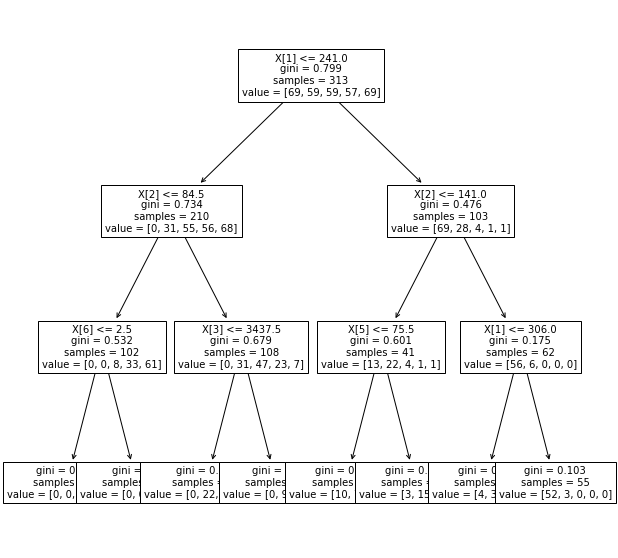

In [45]:
from sklearn import tree
 
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(classifier, fontsize=10)
plt.show()

In [46]:
score = classifier.score(X_test, y_test)
print('Test Accuracy Score', score)

Test Accuracy Score 0.5822784810126582


In [112]:
# save auto_mpg_model as per analysis
d_tree_model_file = open('models/decision_tree_auto_mpg_model.pkl','wb')
pickle.dump(auto_mpg_model, d_tree_model_file)
d_tree_model_file.close()

In [113]:
# reload the model from disk and check if it is saved properly.
d_tree_model_file = open('models/decision_tree_auto_mpg_model.pkl', 'rb')
dtree_model = pickle.load(d_tree_model_file)
d_tree_model_file.close()
print(dtree_model)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)


# Random Forest

In [87]:
# create and fit a RandomForest model

from sklearn.ensemble import RandomForestClassifier 

classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [88]:
# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = classifier.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]
y_pred = classifier.predict(X_test)

In [89]:
y_pred.min(), y_pred.max()

(0, 4)

In [55]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [7,8,9,10,11],
    'criterion' :['gini', 'entropy']
}

In [56]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=classifier, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 8, 9, 10, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [90]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'log2',
 'n_estimators': 500}

In [91]:
rfc1=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 500, max_depth=11, criterion='entropy')


In [92]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       n_estimators=500, random_state=42)

In [93]:
pred=rfc1.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.7721518987341772


In [95]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
coords = [x for x in range(0,5)]
cm = pd.DataFrame(cm,columns=coords, index=coords )
cm


,0,1,2,3,4
0,16,2,0,0,0
1,3,6,4,1,0
2,0,3,9,5,0
3,0,0,3,15,2
4,0,0,0,2,8


## Visualizing Random Forest in the Tree Structure

<Figure size 432x288 with 0 Axes>

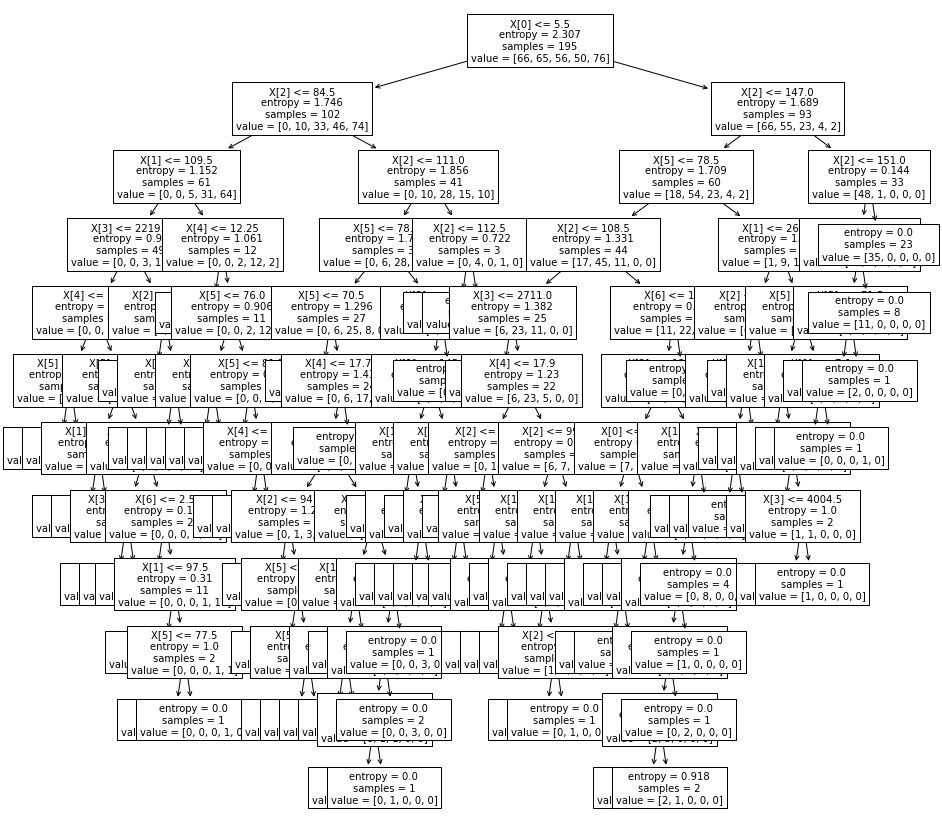

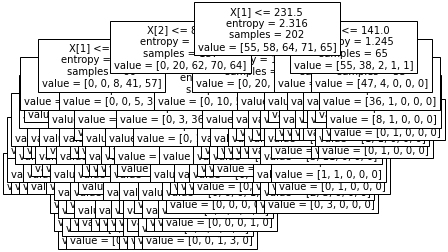

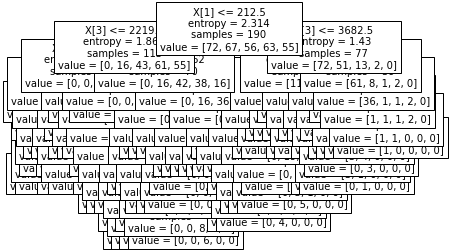

In [96]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure()
fig, ax = plt.subplots(figsize=(15,15))

tree.plot_tree(rfc1.estimators_[5],label='all', fontsize=10)
plt.show()

tree.plot_tree(rfc1.estimators_[8], label='all',fontsize=10)
plt.show()
tree.plot_tree(rfc1.estimators_[3],label='all', fontsize=10)
plt.show()

In [99]:
score = classifier.score(X_test, y_test)
print('Test Accuracy Score', score)

Test Accuracy Score 0.6835443037974683


In [115]:
# save auto_mpg_model as per analysis
random_model_file = open('models/random_forest_auto_mpg_model.pkl','wb')
pickle.dump(auto_mpg_model, random_model_file)
random_model_file.close()

In [116]:
# reload the model from disk and check if it is saved properly.
random_model_file = open('models/random_forest_auto_mpg_model.pkl', 'rb')
random_model = pickle.load(random_model_file)
random_model_file.close()
print(random_model)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)
